In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
[*raw_data]

['TIME.sk',
 'CONFIRMED.sk',
 'RECOVERED.sk',
 'DEATHS.sk',
 'ACTIVE.sk',
 'CONFIRMED.spb',
 'RECOVERED.spb',
 'ACTIVE.spb',
 'IN_HOSPITALS.spb',
 'HOSPITALIZED_TODAY.spb',
 'PCR_TESTS',
 'V1.CS',
 'V1.TODAY',
 'V2.CS',
 'V2.TODAY',
 'V.REMAINING',
 'DESIGNATED_BEDS',
 'VENT',
 'VR1.CS',
 'VR1.TODAY',
 'VR2.CS',
 'VR2.TODAY',
 'FREE_BEDS',
 'OCCUPIED_BEDS_CALCULATED',
 'WEEKLY.REPORTS.BEDS_OCCUPIED.hard',
 'WEEKLY.REPORTS.BEDS_OCCUPIED.mid',
 'WEEKLY.REPORTS.BEDS_OCCUPIED.lite',
 'WEEKLY.REPORTS.BEDS_FREE',
 'WEEKDAY.num',
 'WEEKDAY.ru',
 'WEEKDAY.en']

In [57]:
kk = raw_data['IN_HOSPITALS.spb'].fillna(method='pad')
#raw_data['VENT']

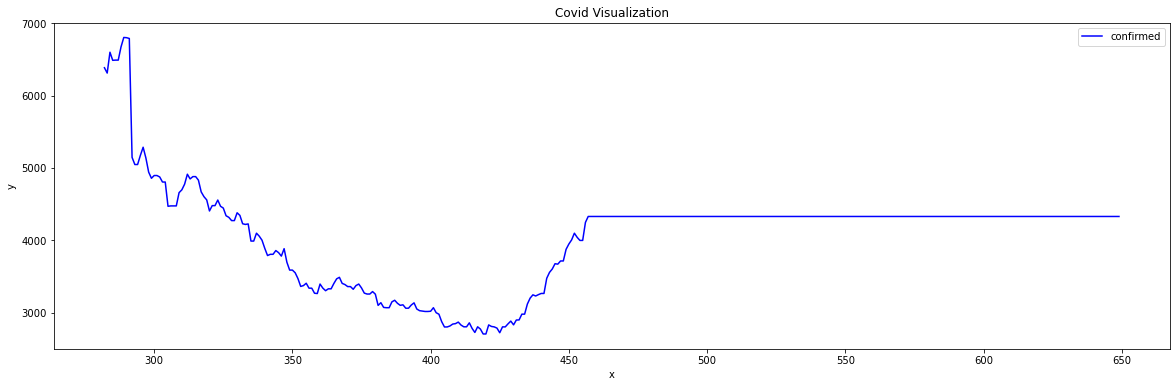

In [58]:

plt.subplots(figsize = (20,6))
plt.plot(raw_data.index.values.tolist(), kk, 'b-', label='confirmed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Covid Visualization')
plt.legend()
    #plt.legend(['confirmed', 'deaths'])
plt.show()



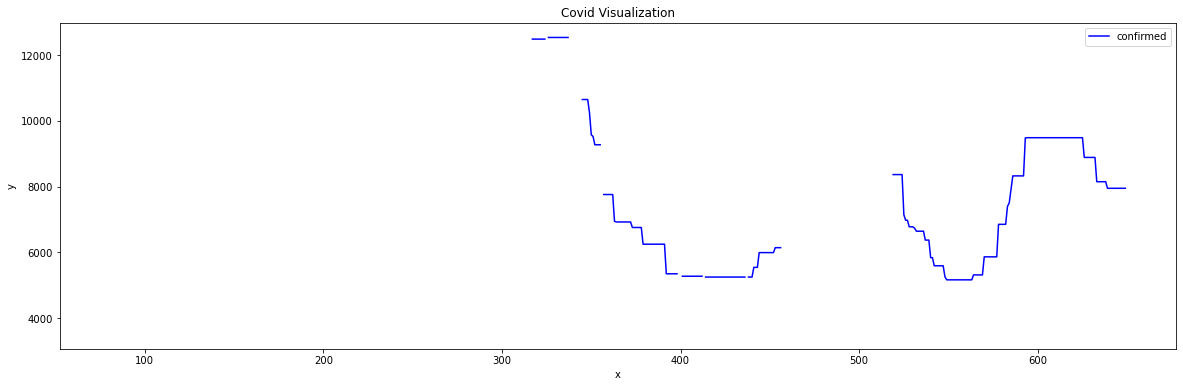

In [60]:

plt.subplots(figsize = (20,6))
plt.plot(raw_data.index.values.tolist(), raw_data['DESIGNATED_BEDS'], 'b-', label='confirmed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Covid Visualization')
plt.legend()
    #plt.legend(['confirmed', 'deaths'])
plt.show()



In [29]:
raw_data['VR1.CS']
for i in raw_data['VR1.CS']:
    if i > 0:
        print(i)

41.0
88.0
136.0
173.0
206.0
210.0
246.0
290.0
327.0
360.0
404.0
419.0
437.0
502.0
552.0
586.0
645.0
769.0
839.0
861.0
939.0
1297.0


In [2]:
raw_data = pd.read_csv('data/SPb.COVID-19.united.csv', na_values='NA', parse_dates=[0,5])
#raw_data = raw_data.fillna(0)
df = raw_data[['CONFIRMED.sk', 'RECOVERED.sk', 'DEATHS.sk', 'ACTIVE.sk']]


In [3]:
kk = raw_data['WEEKLY.REPORTS.BEDS_FREE'].tolist()
for i, elem in enumerate(kk, 0):
    if elem != 0:
        kk[i-6:i] = [elem for x in kk[i-6:i]]

df['WEEKLY.REPORTS.BEDS_FREE'] = pd.Series(kk)
df['IN_HOSPITALS.spb'] = raw_data['IN_HOSPITALS.spb']
df['HOSPITALIZED_TODAY.spb'] = raw_data['HOSPITALIZED_TODAY.spb']
df['PCR_TESTS'] = raw_data['PCR_TESTS']
df['V1.CS'] = raw_data['V1.CS']
df['V1.TODAY'] = raw_data['V1.TODAY']
df['V.REMAINING'] = raw_data['V.REMAINING']
df['DESIGNATED_BEDS'] = raw_data['DESIGNATED_BEDS']
df['VENT'] = raw_data['VENT']
df['VR1.CS'] = raw_data['VR1.CS'].fillna(method='bfill')

<ipython-input-3-4883d2a78c4d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WEEKLY.REPORTS.BEDS_FREE'] = pd.Series(kk)
<ipython-input-3-4883d2a78c4d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IN_HOSPITALS.spb'] = raw_data['IN_HOSPITALS.spb']
<ipython-input-3-4883d2a78c4d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [23]:
dt = pd.to_datetime('2008/08/18', format='%Y/%m/%d')
dt1 = pd.to_datetime('2008/09/26', format='%Y/%m/%d')

(dt1-dt).days

39

## Load Data

In [5]:
# raw_data = pd.read_csv('data/SPb.COVID-19.united.csv', na_values='NA', parse_dates=[0,5], index_col=5)
# raw_data = raw_data.fillna(0)
# date = raw_data.index

# data = raw_data [['CONFIRMED.sk', 'RECOVERED.sk', 'DEATHS.sk', 'ACTIVE.sk']]
# data

In [4]:
raw_data = pd.read_csv('data/SPb.COVID-19.united.csv', na_values='NA', parse_dates=[0,5], index_col=5)
raw_data = raw_data.fillna(0)
date = raw_data.index

data = raw_data [['CONFIRMED.sk', 'RECOVERED.sk', 'DEATHS.sk', 'ACTIVE.sk']]
data

,CONFIRMED.sk,RECOVERED.sk,DEATHS.sk,ACTIVE.sk
DATE.spb,,,,
2020-03-02,0,0,0,0
2020-03-03,0,0,0,0
2020-03-04,0,0,0,0
2020-03-05,1,0,0,1
2020-03-06,0,0,0,1
...,...,...,...,...
2021-12-07,2381,3836,51,33842
2021-12-08,2209,3527,49,32475
2021-12-09,2111,2961,54,31571


In [5]:
def count_total_X(column):
    
    cnt=0
    arr = []
    for item in column:
        cnt+=item
        arr.append(cnt)
    return arr

data['TotalConfirmed'] = count_total_X(data['CONFIRMED.sk'])
data['TotalRecovered'] = count_total_X(data['RECOVERED.sk'])
data['TotalDie'] = count_total_X(data['DEATHS.sk'])


<ipython-input-5-bd580eca9319>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalConfirmed'] = count_total_X(data['CONFIRMED.sk'])
<ipython-input-5-bd580eca9319>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalRecovered'] = count_total_X(data['RECOVERED.sk'])
<ipython-input-5-bd580eca9319>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [6]:
data

,CONFIRMED.sk,RECOVERED.sk,DEATHS.sk,ACTIVE.sk,TotalConfirmed,TotalRecovered,TotalDie
DATE.spb,,,,,,,
2020-03-02,0,0,0,0,0,0,0
2020-03-03,0,0,0,0,0,0,0
2020-03-04,0,0,0,0,0,0,0
2020-03-05,1,0,0,1,1,0,0
2020-03-06,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...
2021-12-07,2381,3836,51,33842,804664,744218,26604
2021-12-08,2209,3527,49,32475,806873,747745,26653
2021-12-09,2111,2961,54,31571,808984,750706,26707


## Smooth Data

In [9]:
full_df

,CONFIRMED.sk_smooth,RECOVERED.sk_smooth,DEATHS.sk_smooth,ACTIVE.sk_smooth,TotalConfirmed_smooth,TotalRecovered_smooth,TotalDie_smooth
DATE.spb,,,,,,,
2020-03-02,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2020-03-03,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2020-03-04,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2020-03-05,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000
2020-03-06,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000
...,...,...,...,...,...,...,...
2021-12-07,2484.57143,2607.00000,57.14286,33839.71429,797313.85714,737037.71429,26436.42857
2021-12-08,2454.57143,2715.28571,55.71429,33523.28571,799768.42857,739753.00000,26492.14286
2021-12-09,2381.42857,2694.57143,55.28571,33154.85714,802149.85714,742447.57143,26547.42857


In [8]:
df_smoothed = data.rolling(7).mean().round(5)
df_smoothed.columns = [col + '_smooth' for col in df_smoothed.columns]

#full_df = pd.concat([data, df_smoothed], axis=1)
full_df = df_smoothed

for column in full_df.columns:
    if column.endswith('_smooth'):
        original_column = column.strip('_smooth')
        full_df[column] = full_df[column].fillna(data[original_column])
        
full_df 

,CONFIRMED.sk_smooth,RECOVERED.sk_smooth,DEATHS.sk_smooth,ACTIVE.sk_smooth,TotalConfirmed_smooth,TotalRecovered_smooth,TotalDie_smooth
DATE.spb,,,,,,,
2020-03-02,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2020-03-03,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2020-03-04,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2020-03-05,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000
2020-03-06,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000
...,...,...,...,...,...,...,...
2021-12-07,2484.57143,2607.00000,57.14286,33839.71429,797313.85714,737037.71429,26436.42857
2021-12-08,2454.57143,2715.28571,55.71429,33523.28571,799768.42857,739753.00000,26492.14286
2021-12-09,2381.42857,2694.57143,55.28571,33154.85714,802149.85714,742447.57143,26547.42857


## Visualize Data

In [10]:
confirmed = np.array(full_df['CONFIRMED.sk_smooth'].tolist())
recovered = np.array(full_df['RECOVERED.sk_smooth'].tolist())
deaths = np.array(full_df['DEATHS.sk_smooth'].tolist())
active = np.array(full_df['ACTIVE.sk_smooth'].tolist())
date = np.array(date.tolist())

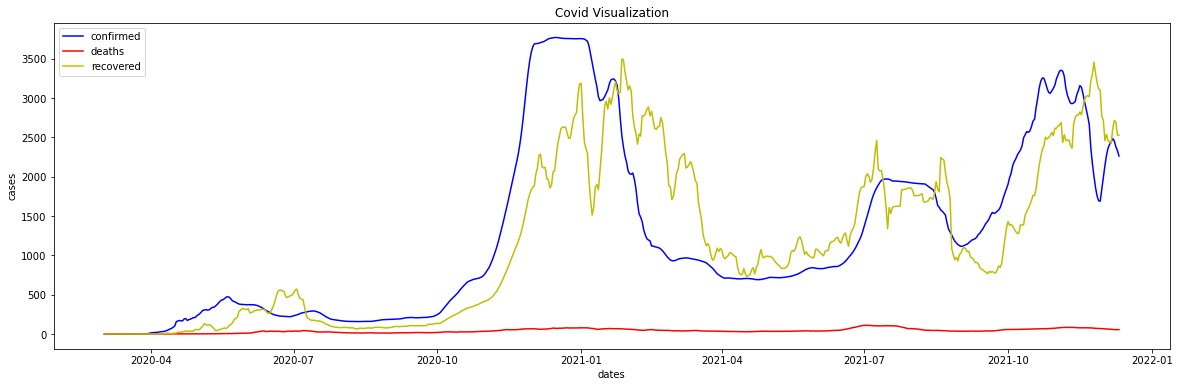

In [11]:
#plt.style.use('fivethirtyeight')
def graph_cases(date, confirmed, deaths, active, recovered):
    plt.subplots(figsize = (20,6))
    plt.plot(date, confirmed, 'b-', label='confirmed')
    plt.plot(date, deaths, 'r-', label='deaths')
    #plt.plot(date, active, 'g-', label='active')
    plt.plot(date, recovered, 'y-', label='recovered')
    plt.xlabel('dates')
    plt.ylabel('cases')
    plt.title('Covid Visualization')
    plt.legend()
    #plt.legend(['confirmed', 'deaths'])
    plt.show()



graph_cases(date, confirmed, deaths, active, recovered)

<ipython-input-12-9f317cbe4a82>:1: RuntimeWarning: divide by zero encountered in log
  graph_cases(date, np.log(confirmed), np.log(deaths), np.log(active), np.log(recovered))


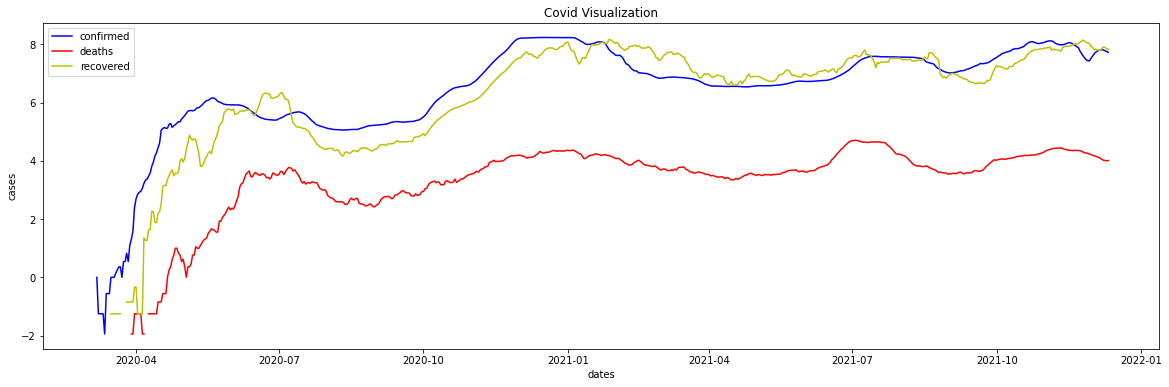

In [12]:
graph_cases(date, np.log(confirmed), np.log(deaths), np.log(active), np.log(recovered))

## 1 wave

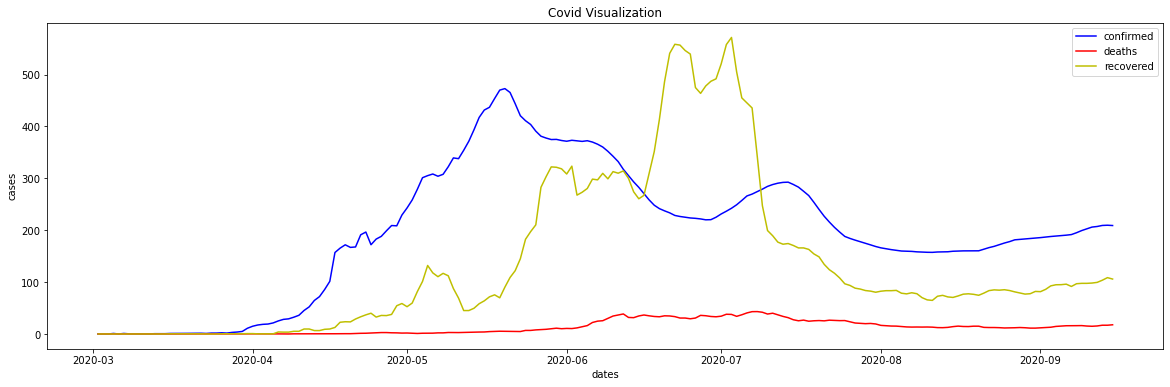

In [245]:
train_subset = full_df[:'2020-09-15']

confirmed = np.array(train_subset['CONFIRMED.sk_smooth'].tolist())
recovered = np.array(train_subset['RECOVERED.sk_smooth'].tolist())
deaths = np.array(train_subset['DEATHS.sk_smooth'].tolist())
active = np.array(train_subset ['ACTIVE.sk_smooth'].tolist())
date = np.array(train_subset.index.tolist())

graph_cases(date, confirmed, deaths, active, recovered)

## Building Model

In [13]:
# SIR with NN

class SEIR:
    def __init__(self, params=None):
        self.params = params

    def get_fit_params(self):
        params = lmfit.Parameters()
        params.add("population", value=5_000_000, vary=False)
        params.add("epidemic_started_days_ago", value=10, vary=False)
        params.add("r0", value=4, min=3, max=5, vary=True) #  The number of people infected by one ill person during the total duration of the disease.
        params.add("alpha", value=0.0064, min=0.005, max=0.0078, vary=True)  # CFR Infectios fertility rq1ate
        params.add("delta", value=1/3, min=1/14, max=1/2, vary=True)  # E -> I rate
        params.add("gamma", value=1/9, min=1/14, max=1/7, vary=True)  # I -> R rate
        params.add("rho", expr='gamma', vary=False)  # I -> D rate == gamma
        return params

    def get_initial_conditions(self, data):
        # Simulate such initial params as to obtain as many deaths as in data
        population = self.params['population']
        epidemic_started_days_ago = self.params['epidemic_started_days_ago']

        t = np.arange(epidemic_started_days_ago)
        (S, E, I, R, D) = self.predict(t, (population - 1, 0, 1, 0, 0))

        I0 = I[-1]
        E0 = E[-1]
        Rec0 = R[-1]
        D0 = D[-1]
        S0 = S[-1]
        return (S0, E0, I0, Rec0, D0)
    
    def compute_daily_values(self, S, E, I, R, D):
        new_dead = (np.diff(D))
        new_recovered = (np.diff(R))
        new_infected = (np.diff(I)) + new_recovered + new_dead
        new_exposed = (np.diff(S[::-1])[::-1])

        return new_exposed, new_infected, new_recovered, new_dead

    def step(self, initial_conditions, t):
        population = self.params['population']
        delta = self.params['delta']
        gamma = self.params['gamma']
        alpha = self.params['alpha']
        rho = self.params['rho']
        
        rt = self.params['r0'].value
        beta = rt * gamma

        S, E, I, R, D = initial_conditions

        new_exposed = beta * I * (S / population)
        new_infected = delta * E
        new_dead = alpha * rho * I
        new_recovered = gamma * (1 - alpha) * I

        dSdt = -new_exposed
        dEdt = new_exposed - new_infected
        dIdt = new_infected - new_recovered - new_dead
        dRdt = new_recovered
        dDdt = new_dead

        assert S + E + I + R + D - population <= 1e10
        assert dSdt + dIdt + dEdt + dRdt + dDdt <= 1e10
        return dSdt, dEdt, dIdt, dRdt, dDdt

    def predict(self, t_range, initial_conditions):
        ret = odeint(self.step, initial_conditions, t_range)
        return ret.T


- for 1 characteristic 
- death rate --> correct
- remove E
- write equations
- [0,1] all hyperaparamters
- after finding gloabl min --> repeat process with some delta


In [53]:
model.params

name,value,initial value,min,max,vary,expression
population,5000000.00,5000000,-inf,inf,False,
epidemic_started_days_ago,10.0000000,10,-inf,inf,False,
r0,4.00000000,4,3.00000000,5.00000000,True,
alpha,0.00640000,0.0064,0.00500000,0.00780000,True,
delta,0.33333333,0.3333333333333333,0.07142857,0.50000000,True,
gamma,0.11111111,0.1111111111111111,0.07142857,0.14285714,True,
rho,0.11111111,None,-inf,inf,False,gamma


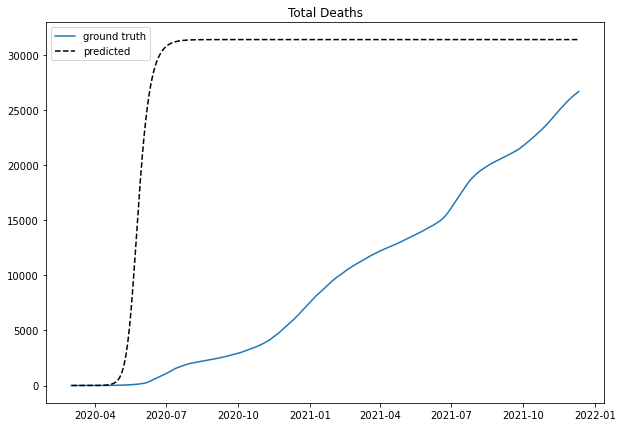

In [50]:
import lmfit
from scipy.integrate import odeint

model = SEIR()

model.params = model.get_fit_params()
train_initial_conditions = model.get_initial_conditions(full_df)
train_t = np.arange(len(full_df))
(S, E, I, R, D) = model.predict(train_t, train_initial_conditions)
plt.figure(figsize=(10, 7))
plt.plot(full_df.index, full_df['TotalDie_smooth'], label='ground truth')
plt.plot(full_df.index, D, label='predicted', color='black', linestyle='dashed' )
plt.legend()
plt.title('Total Deaths')
plt.show()

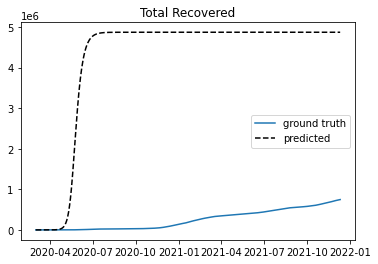

In [59]:
plt.plot(full_df.index, full_df['TotalRecovered_smooth'], label='ground truth')
plt.plot(full_df.index, R, label='predicted', color='black', linestyle='dashed' )
plt.legend()
plt.title('Total Recovered')
plt.show()

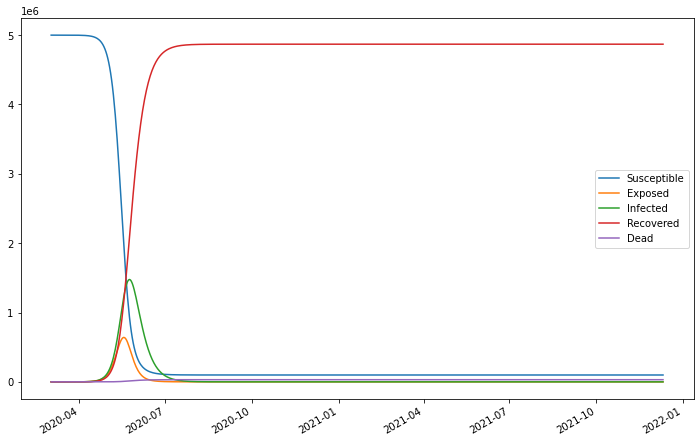

In [19]:
fig = plt.figure(figsize=(10,7))
plt.plot(full_df.index, S, label='Susceptible')
plt.plot(full_df.index, E, label='Exposed')
plt.plot(full_df.index, I, label='Infected')
plt.plot(full_df.index, R, label='Recovered')
plt.plot(full_df.index, D, label='Dead')
plt.legend()
plt.tight_layout()
fig.autofmt_xdate()
plt.show()

# 1 Wave Modeling

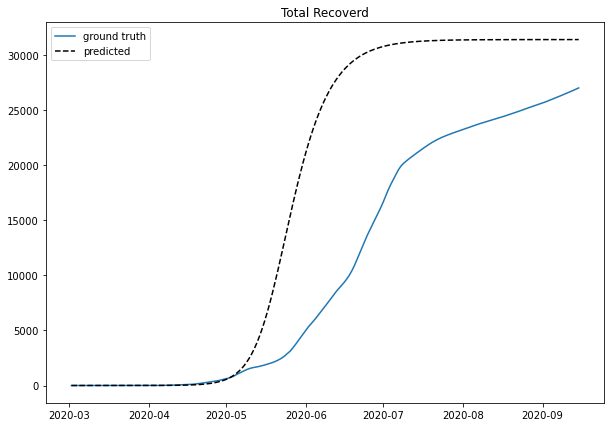

In [260]:
import lmfit
from scipy.integrate import odeint

model = SEIR()

model.params = model.get_fit_params()
train_initial_conditions = model.get_initial_conditions(train_subset)
train_t = np.arange(len(train_subset))
(S, E, I, R, D) = model.predict(train_t, train_initial_conditions)

plt.figure(figsize=(10, 7))
plt.plot(train_subset.index, train_subset['TotalRecovered_smooth'], label='ground truth')
plt.plot(train_subset.index, D, label='predicted', color='black', linestyle='dashed' )
plt.legend()
plt.title('Total Recoverd')
plt.show()

## Explanation
- for paramters we used meta-analysis of COVID-19 characteristics 
-  As input it receives the day number t and the initial size of all groups as a tuple initial_conditions. It returns the changes in all groups.
- describes only one infection wave, after which almost everyone recovers, group immunity is obtained, and the epidemic comes to an end. 

## Optimization

In [142]:
def normalize(P):
    Q = P - np.mean(P)              
    Q = Q/(np.std(P))
    return Q


def norm(P):
    return (P - P.min()) / (P.max() - P.min())


def loss(true, pred, eps=1e-5):
    return np.abs(pred - true) 

In [259]:
def optimize(df, N=1000, best_fit=1e12 ):
    
    best_params = None
    for i in tqdm(range(N)):
        model = SEIR()
        model.params = model.get_fit_params()
    
        # assign params
        model.params['alpha'].value = random.uniform(model.params['alpha'].min,model.params['alpha'].max)
        model.params['delta'].value = random.uniform(model.params['delta'].min,model.params['delta'].max)
        model.params['gamma'].value = random.uniform(model.params['gamma'].min,model.params['gamma'].max)
        model.params['r0'].value = random.uniform(model.params['r0'].min,model.params['r0'].max)
        model.params['rho'].value = model.params['gamma'].value

        train_initial_conditions = model.get_initial_conditions(full_df)
        train_t = np.arange(len(df))
        (S, E, I, R, D) = model.predict(train_t, train_initial_conditions)

        loss_val = loss(np.sum(df['TotalRecovered_smooth'].to_numpy()), np.sum(D))
    
        if loss_val < best_fit:
            best_fit = loss_val
            best_params = model.params
        
    return best_params
   

In [262]:
best_params

name,value,initial value,min,max,vary,expression
population,5000000.00,5000000,-inf,inf,False,
epidemic_started_days_ago,10.0000000,10,-inf,inf,False,
r0,3.57872251,4,3.00000000,5.00000000,True,
alpha,0.00569944,0.0064,0.00500000,0.00780000,True,
delta,0.49763257,0.3333333333333333,0.07142857,0.50000000,True,
gamma,0.07365155,0.1111111111111111,0.07142857,0.14285714,True,
rho,0.07365155,None,-inf,inf,False,gamma


## Best Curve


 68%|██████▊   | 679/1000 [00:17<00:08, 39.60it/s]


100%|██████████| 1000/1000 [00:26<00:00, 38.24it/s][A


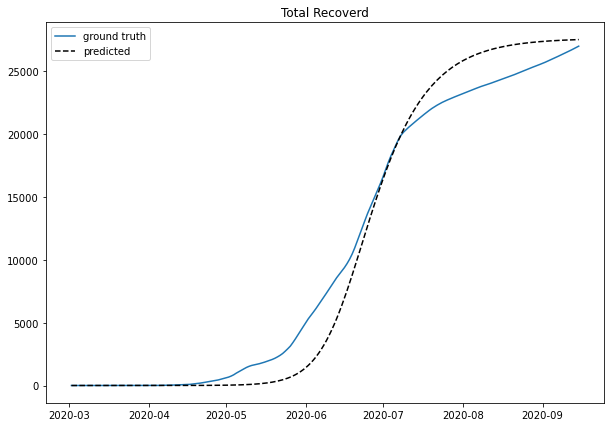

In [261]:
model = SEIR()
model.params = best_params = optimize(train_subset) 
train_initial_conditions = model.get_initial_conditions(full_df)
train_t = np.arange(len(train_subset))
(S, E, I, R, D) = model.predict(train_t, train_initial_conditions)

plt.figure(figsize=(10, 7))
plt.plot(train_subset.index, train_subset['TotalRecovered_smooth'], label='ground truth')
plt.plot(train_subset.index, D, label='predicted', color='black', linestyle='dashed' )
plt.legend()
plt.title('Total Recoverd')
plt.show()

In [157]:
from tqdm import tqdm
N = 10000
best_fit = 1e12
best_params = None
loss_arr = []

for i in tqdm(range(N)):
    model = SEIR()
    model.params = model.get_fit_params()
    
    # assign params
    model.params['alpha'].value = random.uniform(model.params['alpha'].min,model.params['alpha'].max)
    model.params['delta'].value = random.uniform(model.params['delta'].min,model.params['delta'].max)
    model.params['gamma'].value = random.uniform(model.params['gamma'].min,model.params['gamma'].max)
    model.params['r0'].value = random.uniform(model.params['r0'].min,model.params['r0'].max)
    model.params['rho'].value = model.params['gamma'].value

    train_initial_conditions = model.get_initial_conditions(full_df)
    train_t = np.arange(len(full_df))
    (S, E, I, R, D) = model.predict(train_t, train_initial_conditions)

    loss_arr.append(loss(np.sum(norm(full_df['TotalDie_smooth'].to_numpy())), np.sum(norm(D))))
    loss_arr.append(loss(np.sum(norm(full_df['TotalRecovered_smooth'].to_numpy())), np.sum(norm(R))))
    loss_arr.append(loss(np.sum(norm(full_df['TotalConfirmed_smooth'].to_numpy())), np.sum(norm(I))))
    
    if np.array(loss_arr).mean() < best_fit:
        best_fit = np.array(loss_arr).mean()
        best_params = model.params
        
    loss_arr = []

print("best", best_fit)


  4%|▍         | 448/10000 [00:17<06:24, 24.84it/s]


  9%|▉         | 896/10000 [00:36<06:18, 24.03it/s]


 13%|█▎        | 1338/10000 [00:53<05:35, 25.85it/s]


 18%|█▊        | 1779/10000 [01:11<05:29, 24.97it/s]


 22%|██▏       | 2223/10000 [01:29<05:03, 25.61it/s]


 27%|██▋       | 2670/10000 [01:46<04:39, 26.20it/s]


 31%|███       | 3114/10000 [02:04<06:13, 18.44it/s]


 36%|███▌      | 3552/10000 [02:23<04:39, 23.04it/s]


 40%|███▉      | 3990/10000 [02:41<03:53, 25.79it/s]


 44%|████▍     | 4433/10000 [02:57<03:41, 25.12it/s]


 49%|████▊     | 4874/10000 [03:16<03:36, 23.70it/s]


 53%|█████▎    | 5314/10000 [03:33<02:50, 27.43it/s]


 58%|█████▊    | 5758/10000 [03:50<02:51, 24.71it/s]


 62%|██████▏   | 6205/10000 [04:07<02:23, 26.44it/s]


 66%|██████▌   | 6619/10000 [04:26<03:03, 18.44it/s]


 71%|███████   | 7053/10000 [04:46<02:12, 22.30it/s]


 75%|███████▍  | 7481/10000 [05:06<02:07, 19.71it/s]


 79%|███████▉  | 7896/10000 [05:26<01:44, 20.15it/s]


 83%|████████▎ | 8318/10000 [05:46<01:19, 21.08it/s]


 87%|████████▋ | 8665/10000 [06:07<01:28, 15.17it/s]


 90%|█████████ | 9015/10000 [06:26<00:52, 18.79it/s]


 94%|█████████▍| 9432/10000 [06:46<00:25, 22.10it/s]


 98%|█████████▊| 9836/10000 [07:07<00:07, 20.88it/s]


100%|██████████| 10000/10000 [07:15<00:00, 22.96it/s]

best 140.06704616515685


## Optimal Params

In [161]:
best_params

name,value,initial value,min,max,vary,expression
population,5000000.00,5000000,-inf,inf,False,
epidemic_started_days_ago,10.0000000,10,-inf,inf,False,
r0,3.03867321,4,3.00000000,5.00000000,True,
alpha,0.00725209,0.0064,0.00500000,0.00780000,True,
delta,0.07437112,0.3333333333333333,0.07142857,0.50000000,True,
gamma,0.07379427,0.1111111111111111,0.07142857,0.14285714,True,
rho,0.07379427,None,-inf,inf,False,gamma


## Best Recovered Curve V1

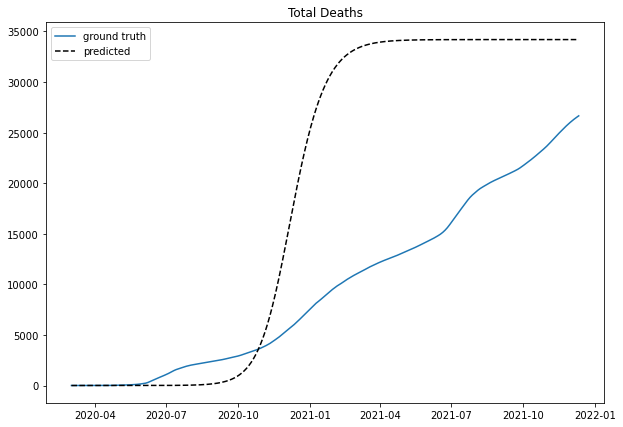

In [160]:
model = SEIR()
model.params = best_params
train_initial_conditions = model.get_initial_conditions(full_df)
train_t = np.arange(len(full_df))
(S, E, I, R, D) = model.predict(train_t, train_initial_conditions)

plt.figure(figsize=(10, 7))
plt.plot(full_df.index, full_df['TotalDie_smooth'], label='ground truth')
plt.plot(full_df.index, D, label='predicted', color='black', linestyle='dashed' )
plt.legend()
plt.title('Total Deaths')
plt.show()

In [107]:
model.params

name,value,initial value,min,max,vary,expression
population,5000000.00,5000000,-inf,inf,False,
epidemic_started_days_ago,10.0000000,10,-inf,inf,False,
r0,4.26875225,4,3.00000000,5.00000000,True,
alpha,0.00575023,0.0064,0.00500000,0.00780000,True,
delta,0.09748581,0.3333333333333333,0.07142857,0.50000000,True,
gamma,0.07909218,0.1111111111111111,0.07142857,0.14285714,True,
rho,0.07909218,None,-inf,inf,False,gamma


## Best Recovered Curve V2

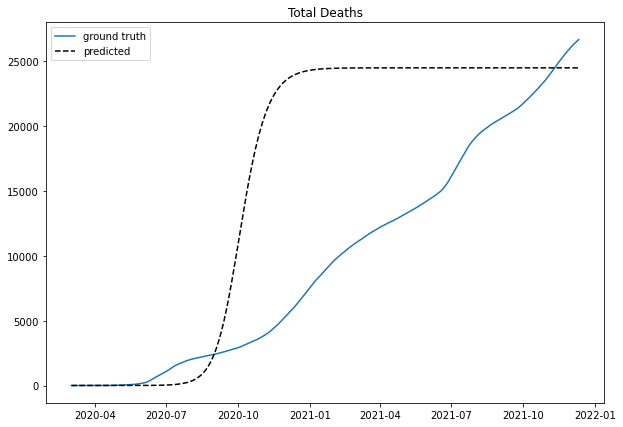

In [129]:
model = SEIR()
model.params = best_params
train_initial_conditions = model.get_initial_conditions(full_df)
train_t = np.arange(len(full_df))
(S, E, I, R, D) = model.predict(train_t, train_initial_conditions)

plt.figure(figsize=(10, 7))
plt.plot(full_df.index, full_df['TotalDie_smooth'], label='ground truth')
plt.plot(full_df.index, D, label='predicted', color='black', linestyle='dashed' )
plt.legend()
plt.title('Total Deaths')
plt.show()

## Full Prediction

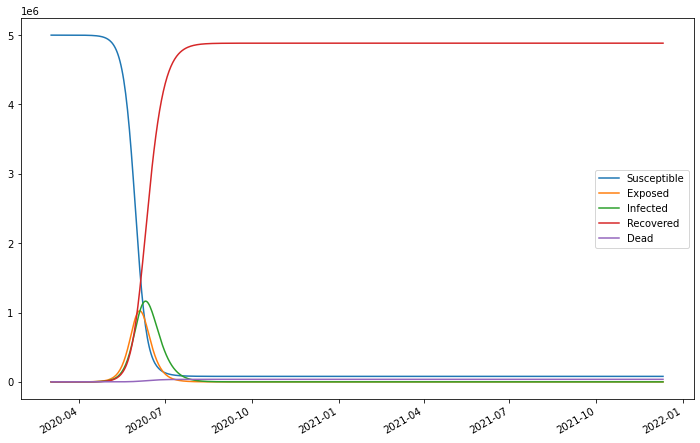

In [158]:
fig = plt.figure(figsize=(10,7))
plt.plot(full_df.index, S, label='Susceptible')
plt.plot(full_df.index, E, label='Exposed')
plt.plot(full_df.index, I, label='Infected')
plt.plot(full_df.index, R, label='Recovered')
plt.plot(full_df.index, D, label='Dead')
plt.legend()
plt.tight_layout()
fig.autofmt_xdate()
plt.show()

# Arima

### Confirmed

/Users/pavelshaburov/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  429
Model:                ARIMA(20, 3, 1)   Log Likelihood               -1709.095
Date:                Mon, 27 Dec 2021   AIC                           3462.191
Time:                        23:38:07   BIC                           3551.388
Sample:                             0   HQIC                          3497.426
                                - 429                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1691      0.110      1.532      0.126      -0.047       0.385
ar.L2         -0.0591      0.080     -0.741      0.458      -0.215       0.097
ar.L3         -0.1104      0.074     -1.501      0.1

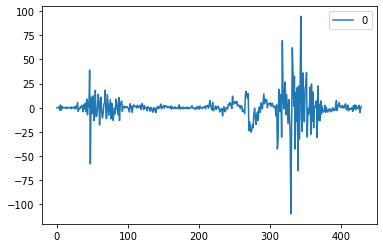

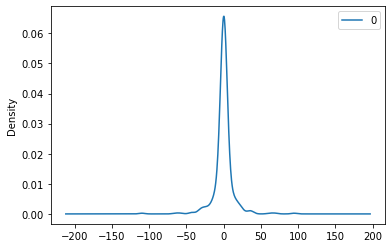

                0
count  429.000000
mean     0.005106
std     13.222369
min   -109.785910
25%     -1.718616
50%      0.011926
75%      2.424777
max     94.573348


In [228]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


confimed = full_df['TotalConfirmed_smooth']
confimed = np.log(confimed[confimed != 0])

X = confirmed
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

model = ARIMA(train, order=(20,3,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [263]:
len(test)

212

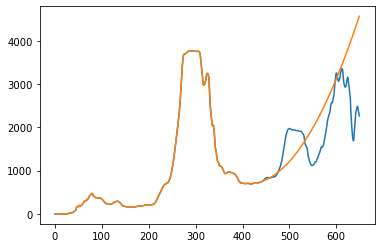

In [229]:
pyplot.plot(np.concatenate((train, test)))
pyplot.plot(np.concatenate((train, model_fit.forecast(steps=len(test)))))
#pyplot.plot(model_fit.forecast(steps=len(test)), color='red')
pyplot.show()

## Recovered

In [230]:
recovered = full_df['TotalRecovered_smooth']
recovered = np.log(recovered[recovered != 0])

X = recovered
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

model = ARIMA(train, order=(20,3,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)

/Users/pavelshaburov/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/pavelshaburov/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/pavelshaburov/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                                 SARIMAX Results                                 
Dep. Variable:     TotalRecovered_smooth   No. Observations:                  419
Model:                   ARIMA(20, 3, 1)   Log Likelihood                 977.587
Date:                   Mon, 27 Dec 2021   AIC                          -1911.174
Time:                           23:48:34   BIC                          -1822.499
Sample:                       03-16-2020   HQIC                         -1876.112
                            - 05-08-2021                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5552     17.736     -0.031      0.975     -35.317      34.206
ar.L2         -0.5051     20.593     -0.025      0.980     -40.866      39.856
ar.L3         -0.2712     21

/Users/pavelshaburov/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


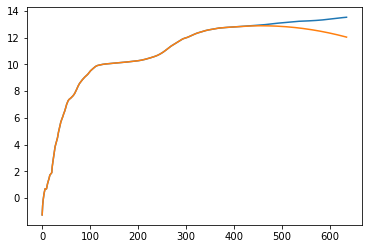

In [231]:
pyplot.plot(np.concatenate((train, test)))
pyplot.plot(np.concatenate((train, model_fit.forecast(steps=len(test)))))
#pyplot.plot(model_fit.forecast(steps=len(test)), color='red')
pyplot.show()

## Death

In [232]:
die = full_df['TotalDie_smooth']
die = np.log(die[die != 0])

X = die
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

model = ARIMA(train, order=(20,3,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)

                               SARIMAX Results                                
Dep. Variable:        TotalDie_smooth   No. Observations:                  411
Model:                ARIMA(20, 3, 1)   Log Likelihood                1193.815
Date:                Mon, 27 Dec 2021   AIC                          -2343.629
Time:                        23:50:15   BIC                          -2255.381
Sample:                    03-31-2020   HQIC                         -2308.709
                         - 05-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4374      0.449     -0.974      0.330      -1.318       0.443
ar.L2         -0.0458      0.358     -0.128      0.898      -0.747       0.656
ar.L3         -0.1090      0.156     -0.701      0.4

/Users/pavelshaburov/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


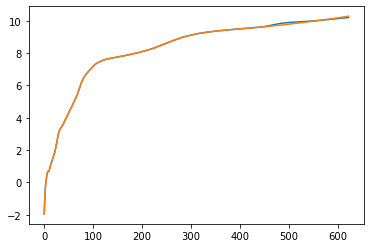

In [233]:
pyplot.plot(np.concatenate((train, test)))
pyplot.plot(np.concatenate((train, model_fit.forecast(steps=len(test)))))
#pyplot.plot(model_fit.forecast(steps=len(test)), color='red')
pyplot.show()